## 1. Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, normaltest

# Settings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('Libraries imported successfully!')

Libraries imported successfully!


## 2. Load Dataset

In [19]:
# Load the dataset
# The file is in Excel format (.xlsx), so we use pd.read_excel()
df = pd.read_excel(r'C:\Users\harsh\OneDrive\Desktop\infosys\SupplyChain_ShipmentSure_Schema.xlsx')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Total records: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")

Dataset loaded successfully!
Shape: (1000, 19)
Total records: 1,000
Total features: 19


## 3. Dataset Schema and Data Types

### 3.1 Basic Information

In [5]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,order_id,supplier_id,supplier_rating,supplier_lead_time,order_date,promised_delivery_date,actual_delivery_date,shipment_mode,shipping_distance_km,order_quantity,unit_price,total_order_value,weather_condition,region,holiday_period,previous_on_time_rate,carrier_name,delayed_reason_code,on_time_delivery
0,ORD100001,SUP_173,3.88,6,2024-04-12,2024-04-18,2024-04-23,Road,177,18,295.18,5313.24,Clear,North,No,0.88,LocalTruckers,Operational,0
1,ORD100002,SUP_133,4.69,9,2025-03-11,2025-03-20,2025-03-20,Sea,487,15,460.82,6912.30,Rainy,East,No,0.84,FedEx,NaN,1
2,ORD100003,SUP_137,1.82,8,2024-09-27,2024-10-05,2024-10-11,Road,517,7,159.18,1114.26,Rainy,East,No,0.61,UPS,Traffic,0
3,ORD100004,SUP_084,2.84,6,2024-04-16,2024-04-22,2024-04-22,Road,17,14,236.77,3314.78,Clear,North,No,0.82,DHL,NaN,1
4,ORD100005,SUP_257,4.10,6,2024-03-12,2024-03-18,2024-03-18,Sea,2775,9,207.32,1865.88,Clear,West,No,0.94,FedEx,NaN,1


In [20]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                1000 non-null   object 
 1   supplier_id             1000 non-null   object 
 2   supplier_rating         1000 non-null   float64
 3   supplier_lead_time      1000 non-null   int64  
 4   order_date              1000 non-null   object 
 5   promised_delivery_date  1000 non-null   object 
 6   actual_delivery_date    1000 non-null   object 
 7   shipment_mode           1000 non-null   object 
 8   shipping_distance_km    1000 non-null   int64  
 9   order_quantity          1000 non-null   int64  
 10  unit_price              1000 non-null   float64
 11  total_order_value       1000 non-null   float64
 12  weather_condition       1000 non-null   object 
 13  region                  1000 non-null   object 
 14  holiday_period      

In [12]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,supplier_rating,supplier_lead_time,shipping_distance_km,order_quantity,unit_price,total_order_value,previous_on_time_rate,on_time_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.983740,5.971000,989.934000,10.895000,246.656220,2670.167120,0.798610,0.491000
std,1.150221,2.247935,1123.224771,3.118285,142.732797,1777.247095,0.113503,0.500169
min,1.000000,1.000000,10.000000,3.000000,5.120000,47.700000,0.600000,0.000000
25%,2.020000,4.000000,308.750000,9.000000,121.172500,1226.167500,0.700000,0.000000
50%,2.980000,6.000000,567.000000,11.000000,248.725000,2430.535000,0.800000,0.000000
75%,3.930000,7.000000,1163.500000,13.000000,367.027500,3813.367500,0.900000,1.000000
max,5.000000,14.000000,6178.000000,22.000000,499.650000,9366.240000,0.990000,1.000000


### 3.2 Data Types Analysis

In [29]:
# Show all object columns
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Object Columns ({len(object_cols)} total):")
for i, col in enumerate(object_cols, 1):
    samples = df[col].unique()[:2]
    print(f"  {i:2d}. {col:30s} → {samples}")


Object Columns (11 total):
   1. order_id                       → ['ORD100001' 'ORD100002']
   2. supplier_id                    → ['SUP_173' 'SUP_133']
   3. order_date                     → ['2024-04-12' '2025-03-11']
   4. promised_delivery_date         → ['2024-04-18' '2025-03-20']
   5. actual_delivery_date           → ['2024-04-23' '2025-03-20']
   6. shipment_mode                  → ['Road' 'Sea']
   7. weather_condition              → ['Clear' 'Rainy']
   8. region                         → ['North' 'East']
   9. holiday_period                 → ['No' 'Yes']
  10. carrier_name                   → ['LocalTruckers' 'FedEx']
  11. delayed_reason_code            → ['Operational' nan]


In [61]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}")

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col}")


Numerical Columns (8):
  • supplier_rating
  • supplier_lead_time
  • shipping_distance_km
  • order_quantity
  • unit_price
  • total_order_value
  • previous_on_time_rate
  • on_time_delivery

Categorical Columns (11):
  • order_id
  • supplier_id
  • order_date
  • promised_delivery_date
  • actual_delivery_date
  • shipment_mode
  • weather_condition
  • region
  • holiday_period
  • carrier_name
  • delayed_reason_code


### 3.3 Data Quality Check

In [16]:
# Missing values
print("Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing_Count', ascending=False)

print(missing_data[missing_data['Missing_Count'] > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing Values Analysis:
                                  Column  Missing_Count  Missing_Percentage
delayed_reason_code  delayed_reason_code            491                49.1

Total missing values: 491

Duplicate rows: 0


## 4. Univariate Analysis

### 4.1 Target Variable: on_time_delivery

Target Variable: on_time_delivery

Value Counts:
on_time_delivery
0    509
1    491
Name: count, dtype: int64

Percentage Distribution:
on_time_delivery
0    50.9
1    49.1
Name: proportion, dtype: float64


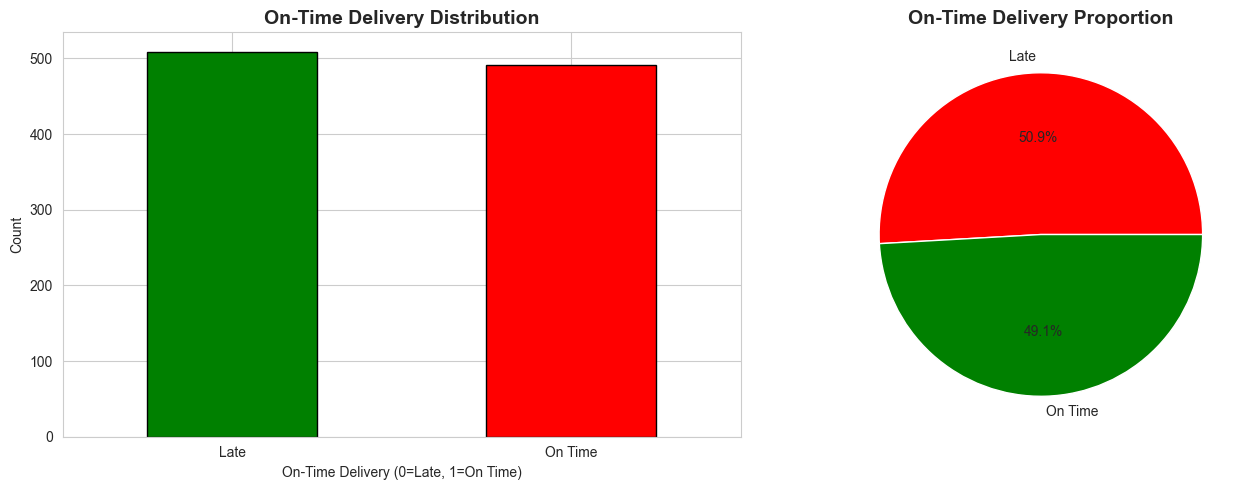


 Class Imbalance Ratio: 1.04


In [84]:
# Analyze target variable (on_time_delivery)
target_col = 'on_time_delivery'

print(f"Target Variable: {target_col}")
print("\nValue Counts:")
print(df[target_col].value_counts())
print("\nPercentage Distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df[target_col].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'], edgecolor='black')
axes[0].set_title('On-Time Delivery Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('On-Time Delivery (0=Late, 1=On Time)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Late', 'On Time'], rotation=0)

# Pie chart
df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                     colors=['red', 'green'], labels=['Late', 'On Time'])
axes[1].set_title('On-Time Delivery Proportion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('target_variable_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Class balance check
delivery_counts = df[target_col].value_counts()
imbalance_ratio = delivery_counts.max() / delivery_counts.min()
print(f"\n Class Imbalance Ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print("   Note: Moderate class imbalance detected. Consider using SMOTE or class weights.")


### 4.2 Numerical Features Distribution

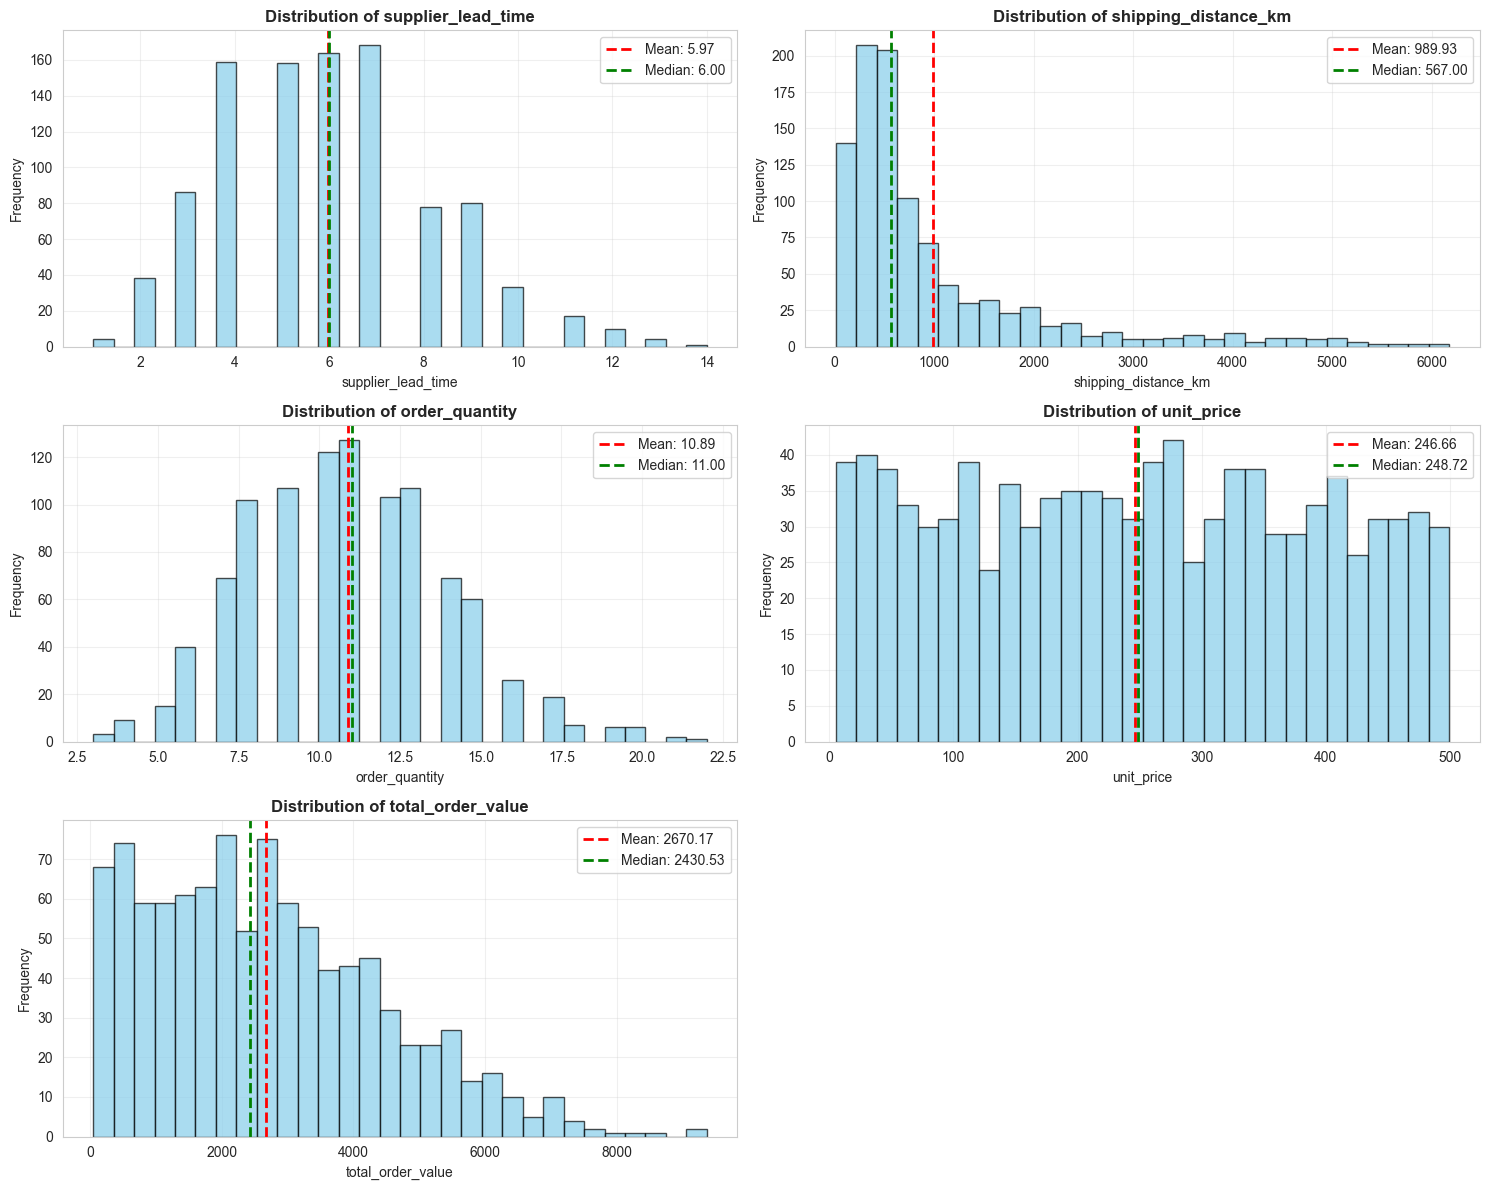

In [80]:
# Distribution of key numerical features
key_numerical = ['supplier_lead_time', 'shipping_distance_km', 'order_quantity', 
                 'unit_price', 'total_order_value']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


In [81]:
# Statistical summary of key numerical features
print("\nDetailed Statistics for Numerical Features:")
df[key_numerical].describe().T


Detailed Statistics for Numerical Features:


,count,mean,std,min,25%,50%,75%,max
supplier_lead_time,1000.0,5.97100,2.247935,1.00,4.0000,6.000,7.0000,14.00
shipping_distance_km,1000.0,989.93400,1123.224771,10.00,308.7500,567.000,1163.5000,6178.00
order_quantity,1000.0,10.89500,3.118285,3.00,9.0000,11.000,13.0000,22.00
unit_price,1000.0,246.65622,142.732797,5.12,121.1725,248.725,367.0275,499.65
total_order_value,1000.0,2670.16712,1777.247095,47.70,1226.1675,2430.535,3813.3675,9366.24


### 4.3 Categorical Features Analysis

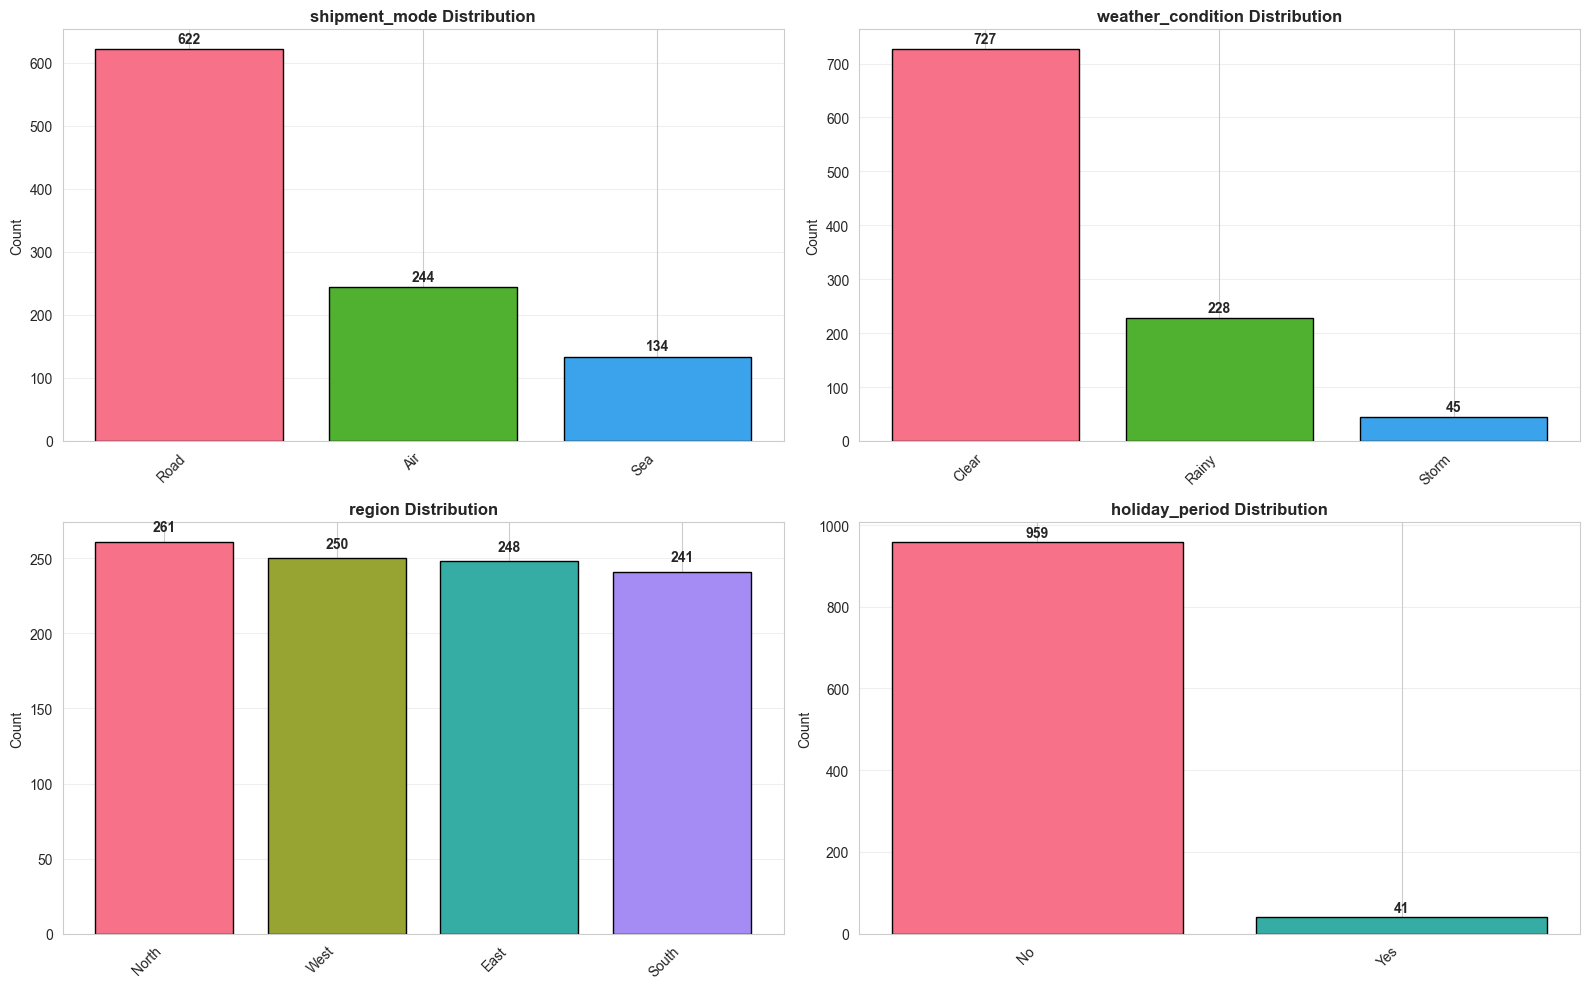

In [82]:
# Analyze categorical variables
categorical_features = ['shipment_mode', 'weather_condition', 'region', 'holiday_period']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette('husl', len(value_counts)), edgecolor='black')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Count')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


In [83]:
# Detailed categorical analysis
print("\nCategorical Features Summary:")
for col in categorical_features:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 3 categories:")
    print(df[col].value_counts().head(3).to_string())


Categorical Features Summary:

shipment_mode:
  Unique values: 3
  Top 3 categories:
shipment_mode
Road    622
Air     244
Sea     134

weather_condition:
  Unique values: 3
  Top 3 categories:
weather_condition
Clear    727
Rainy    228
Storm     45

region:
  Unique values: 4
  Top 3 categories:
region
North    261
West     250
East     248

holiday_period:
  Unique values: 2
  Top 3 categories:
holiday_period
No     959
Yes     41


## 5. Bivariate Analysis

### 5.1 Correlation Analysis

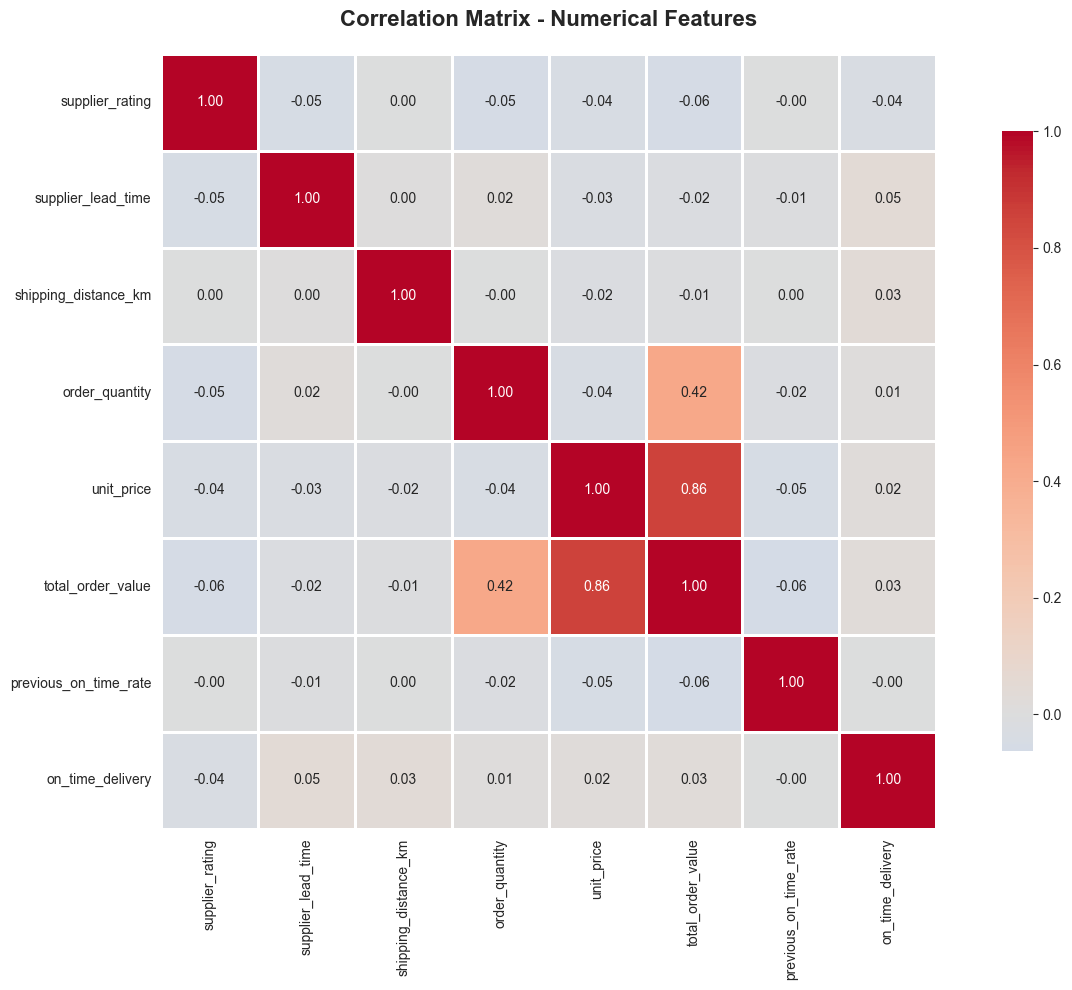


Top 10 Strongest Correlations (excluding diagonal):
total_order_value      unit_price               0.855162
unit_price             total_order_value        0.855162
total_order_value      order_quantity           0.423062
order_quantity         total_order_value        0.423062
previous_on_time_rate  total_order_value        0.063184
total_order_value      previous_on_time_rate    0.063184
supplier_rating        total_order_value        0.056240
total_order_value      supplier_rating          0.056240
order_quantity         supplier_rating          0.052682
supplier_rating        order_quantity           0.052682
dtype: float64


In [33]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTop 10 Strongest Correlations (excluding diagonal):")
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1]
print(corr_pairs.abs().sort_values(ascending=False).head(10))

### 5.2 Target Variable vs Numerical Features

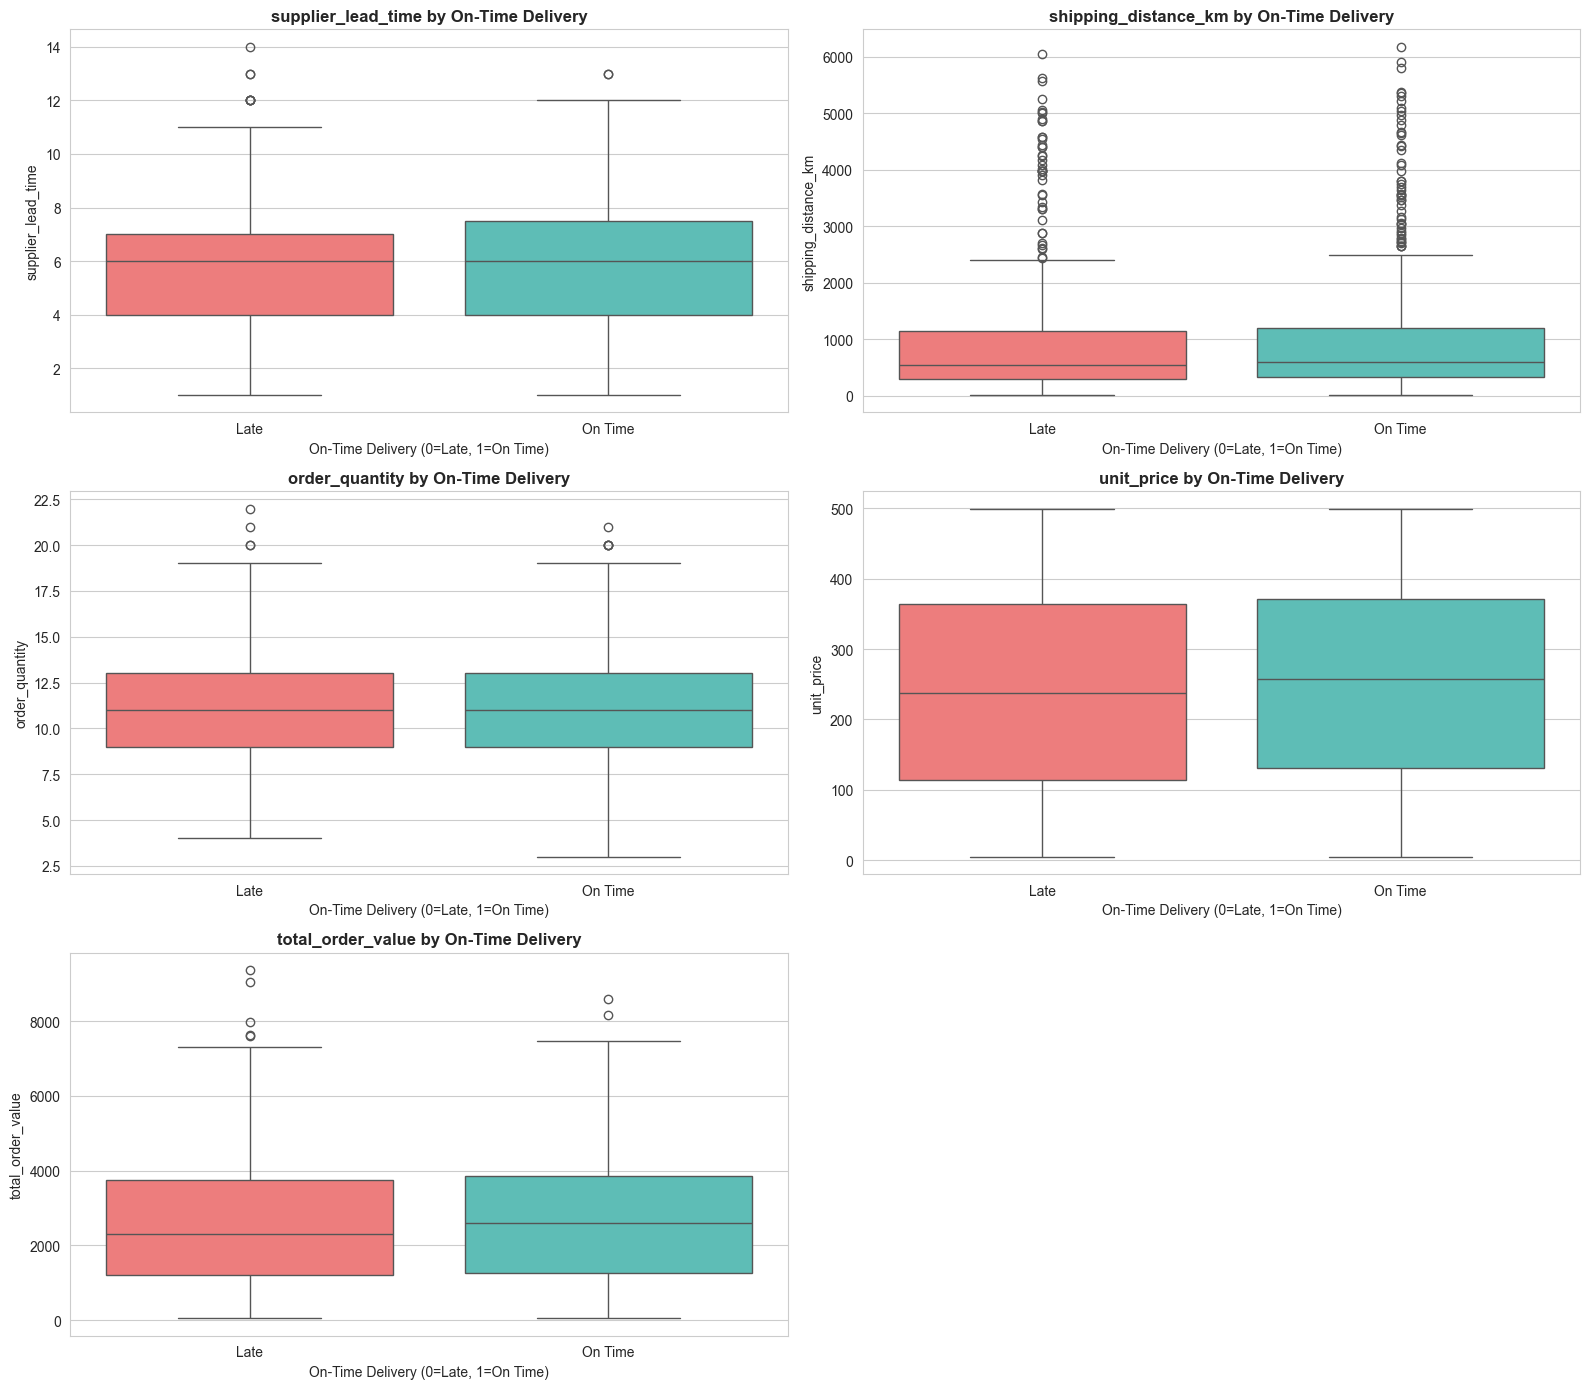

In [37]:
# Box plots: Numerical features by On-Time Delivery
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    sns.boxplot(data=df, x='on_time_delivery', y=col, ax=axes[idx], palette=['#ff6b6b', '#4ecdc4'])
    axes[idx].set_title(f'{col} by On-Time Delivery', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('On-Time Delivery (0=Late, 1=On Time)')
    axes[idx].set_ylabel(col)
    axes[idx].set_xticklabels(['Late', 'On Time'])

axes[5].axis('off')
plt.tight_layout()
plt.savefig('numerical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()


### 5.3 Target Variable vs Categorical Features

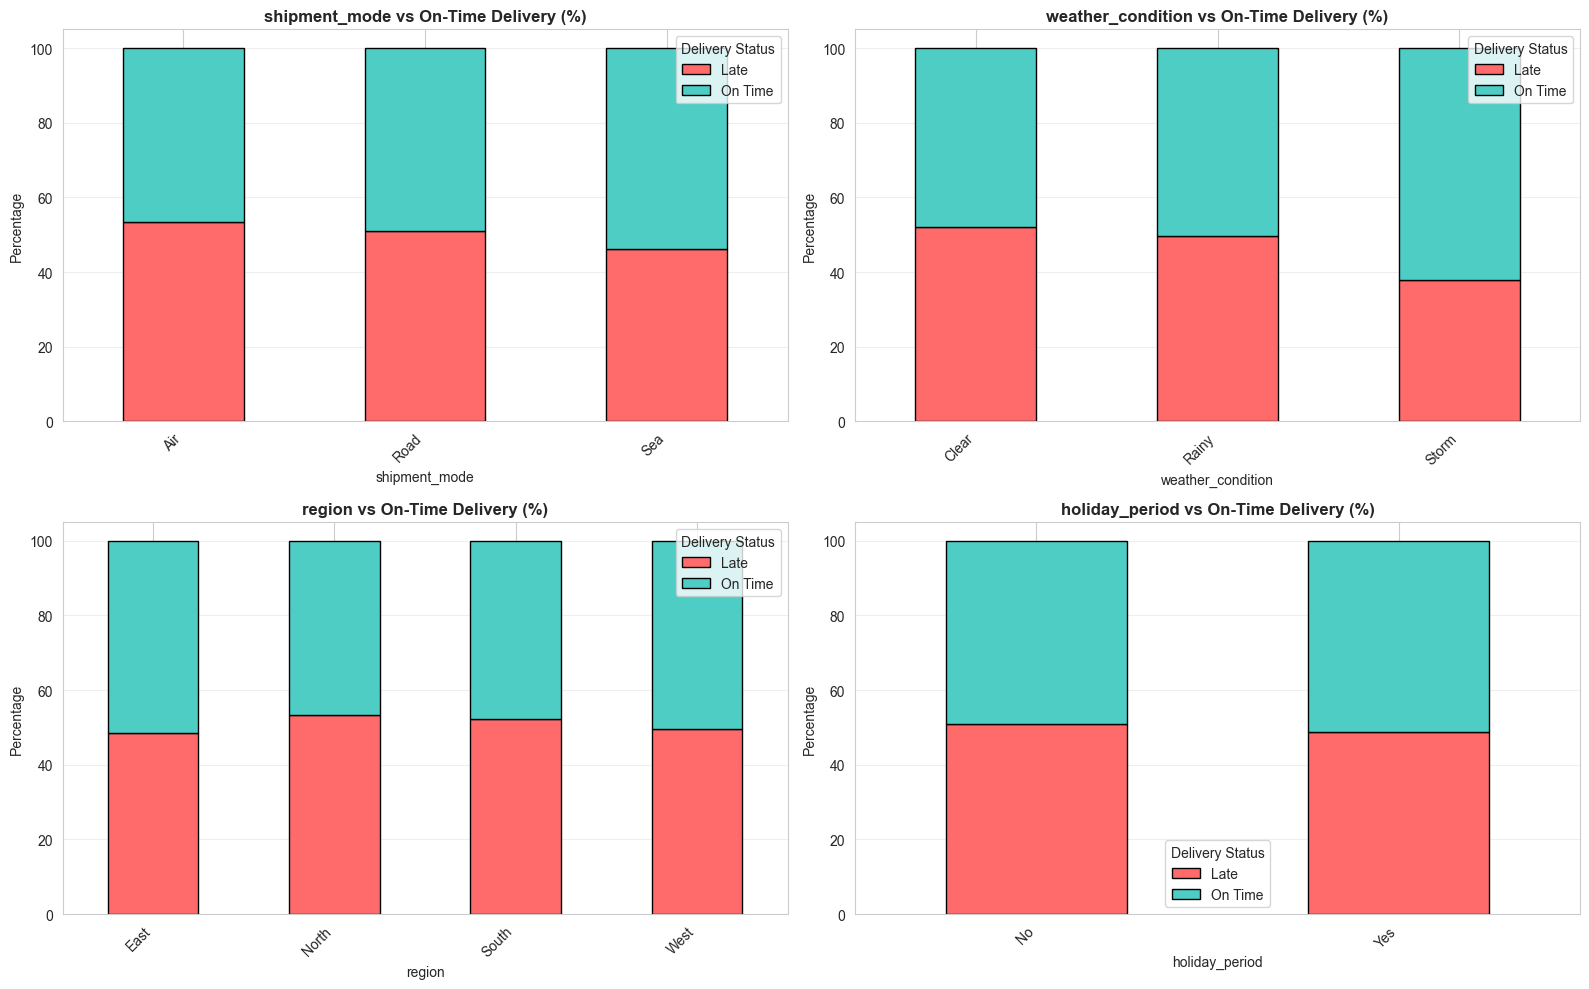

In [41]:
# Stacked bar plots: Categorical features vs On-Time Delivery
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_features):
    ct = pd.crosstab(df[col], df['on_time_delivery'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=axes[idx], color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
    axes[idx].set_title(f'{col} vs On-Time Delivery (%)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].legend(['Late', 'On Time'], title='Delivery Status')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('categorical_vs_target.png', dpi=300, bbox_inches='tight')
plt.show()


### 5.4 Pairwise Relationships - Key Features

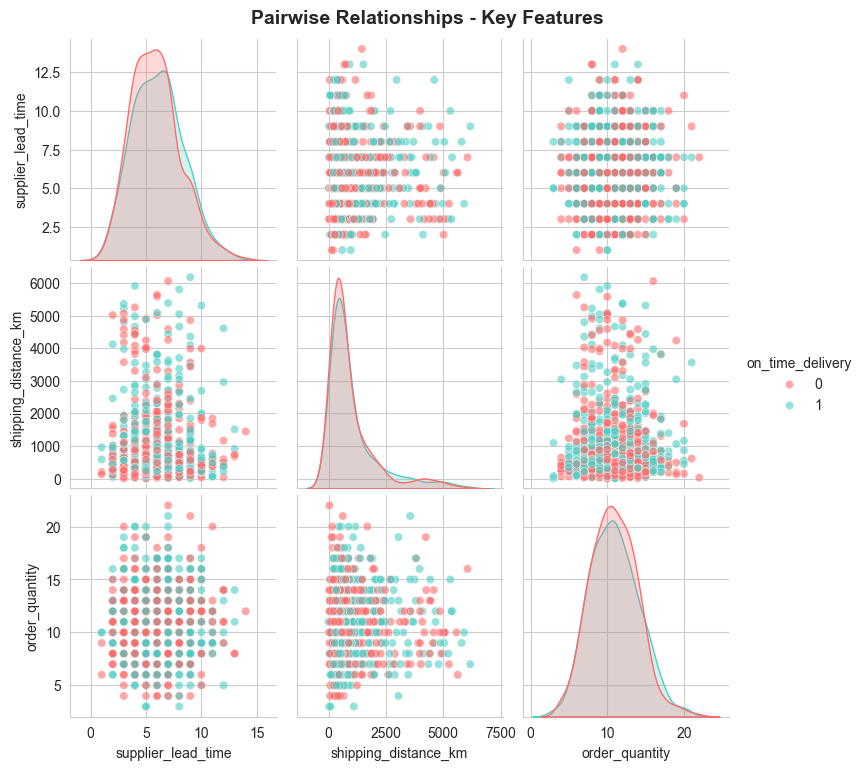

In [45]:
# Pairwise scatter plot matrix - Key numerical features
key_features_pairplot = ['supplier_lead_time', 'shipping_distance_km', 'order_quantity', 'on_time_delivery']

sns.pairplot(df[key_features_pairplot], hue='on_time_delivery', 
             palette=['#ff6b6b', '#4ecdc4'], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships - Key Features', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()


---

# MILESTONE 2: DATA PREPROCESSING AND FEATURE ENGINEERING
## Week 3-4: Transform raw data into machine learning-ready features

---

In [ ]:
# 1. MISSING VALUE ANALYSIS & HANDLING

print("="*70)
print("STEP 1: MISSING VALUE ANALYSIS & HANDLING")
print("="*70)

# Detailed missing values analysis
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
}).sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])
print(f"\nTotal missing values in dataset: {df.isnull().sum().sum()}")

# Strategy for handling missing values
print("\n" + "-"*70)
print("HANDLING STRATEGY:")
print("-"*70)

# Create a copy for processing
df_processed = df.copy()

# Handle missing values based on analysis
if df_processed.isnull().sum().sum() > 0:
    # Numerical columns: Use median
    numerical_with_missing = df_processed.select_dtypes(include=['int64', 'float64']).columns
    numerical_with_missing = [col for col in numerical_with_missing if df_processed[col].isnull().sum() > 0]
    
    # Categorical columns: Use mode
    categorical_with_missing = df_processed.select_dtypes(include=['object']).columns
    categorical_with_missing = [col for col in categorical_with_missing if df_processed[col].isnull().sum() > 0]
    
    # Impute numerical columns with median
    for col in numerical_with_missing:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"  ✓ {col}: Filled with median ({median_val:.2f})")
    
    # Impute categorical columns with mode
    for col in categorical_with_missing:
        mode_val = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_val, inplace=True)
        print(f"  ✓ {col}: Filled with mode ({mode_val})")
else:
    print("  ✓ No missing values found!")

print(f"\nMissing values after handling: {df_processed.isnull().sum().sum()}")


In [ ]:
# 2. CATEGORICAL ENCODING

print("\n" + "="*70)
print("STEP 2: CATEGORICAL VARIABLE ENCODING")
print("="*70)

# Identify categorical columns mentioned in requirements
categorical_to_encode = ['shipment_mode', 'weather_condition', 'region', 'holiday_period']

# Check for other categorical columns
other_categorical = df_processed.select_dtypes(include=['object']).columns.tolist()
if 'on_time_delivery' in other_categorical:
    other_categorical.remove('on_time_delivery')

print(f"\nCategorical columns to encode: {categorical_to_encode}")
print(f"\nAll categorical columns in dataset: {other_categorical}")

# Initialize encoders for each categorical variable
from sklearn.preprocessing import LabelEncoder

encoders = {}

# Label encode all categorical columns except target
for col in other_categorical:
    le = LabelEncoder()
    df_processed[col + '_encoded'] = le.fit_transform(df_processed[col])
    encoders[col] = le
    
    # Print encoding mapping
    print(f"\n{col} Encoding:")
    encoding_map = dict(zip(le.classes_, le.transform(le.classes_)))
    for original, encoded in encoding_map.items():
        print(f"  {original:20s} → {encoded}")

# Drop original categorical columns (keep encoded versions)
original_categorical_cols = other_categorical.copy()
for col in original_categorical_cols:
    df_processed.drop(col, axis=1, inplace=True)

print(f"\nCategorical encoding completed!")
print(f"Dataset shape after encoding: {df_processed.shape}")
